In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [39]:
# Define the ticker symbol for the S&P 500
ticker_sp = "^GSPC"

# Download daily data for a specified time range (optional)
data_sp = yf.download(ticker_sp, interval='1d', start='2005-01-01', end='2015-01-01')


[*********************100%***********************]  1 of 1 completed


In [40]:
data_sp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000
2005-01-04,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000
2005-01-05,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000
2005-01-06,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000
2005-01-07,1187.890015,1192.199951,1182.160034,1186.189941,1186.189941,1477900000


In [41]:
# Calculate arithmetic returns for the S&P 500
data_sp['Returns'] = data_sp['Adj Close'].pct_change()
data_sp = data_sp.dropna()

In [42]:
data_sp.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2005-01-04,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000,-0.011671
2005-01-05,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000,-0.003628
2005-01-06,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000,0.003506
2005-01-07,1187.890015,1192.199951,1182.160034,1186.189941,1186.189941,1477900000,-0.001431
2005-01-10,1186.189941,1194.780029,1184.800049,1190.250000,1190.250000,1490400000,0.003423


In [43]:
# Define the window size (for example, 20 days)
window_size = 30

# Compute the rolling mean
data_sp['Rolling_Mean'] = data_sp['Returns'].rolling(window=window_size).mean()

# Compute the rolling standard deviation
data_sp['Rolling_Std'] = data_sp['Returns'].rolling(window=window_size).std()

data_sp = data_sp.dropna()


/var/folders/wm/4ny6twxx66j7x5k3wtkqgpjw0000gn/T/ipykernel_34911/2037527562.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sp['Rolling_Mean'] = data_sp['Returns'].rolling(window=window_size).mean()
/var/folders/wm/4ny6twxx66j7x5k3wtkqgpjw0000gn/T/ipykernel_34911/2037527562.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sp['Rolling_Std'] = data_sp['Returns'].rolling(window=window_size).std()


In [44]:
# Number of trading days in a year
trading_days = 252

# Annualizing the rolling mean (returns)
data_sp['Annualized_Mean'] = data_sp['Rolling_Mean'] * trading_days

# Annualizing the rolling standard deviation (volatility)
data_sp['Annualized_Std'] = data_sp['Rolling_Std'] * np.sqrt(trading_days)


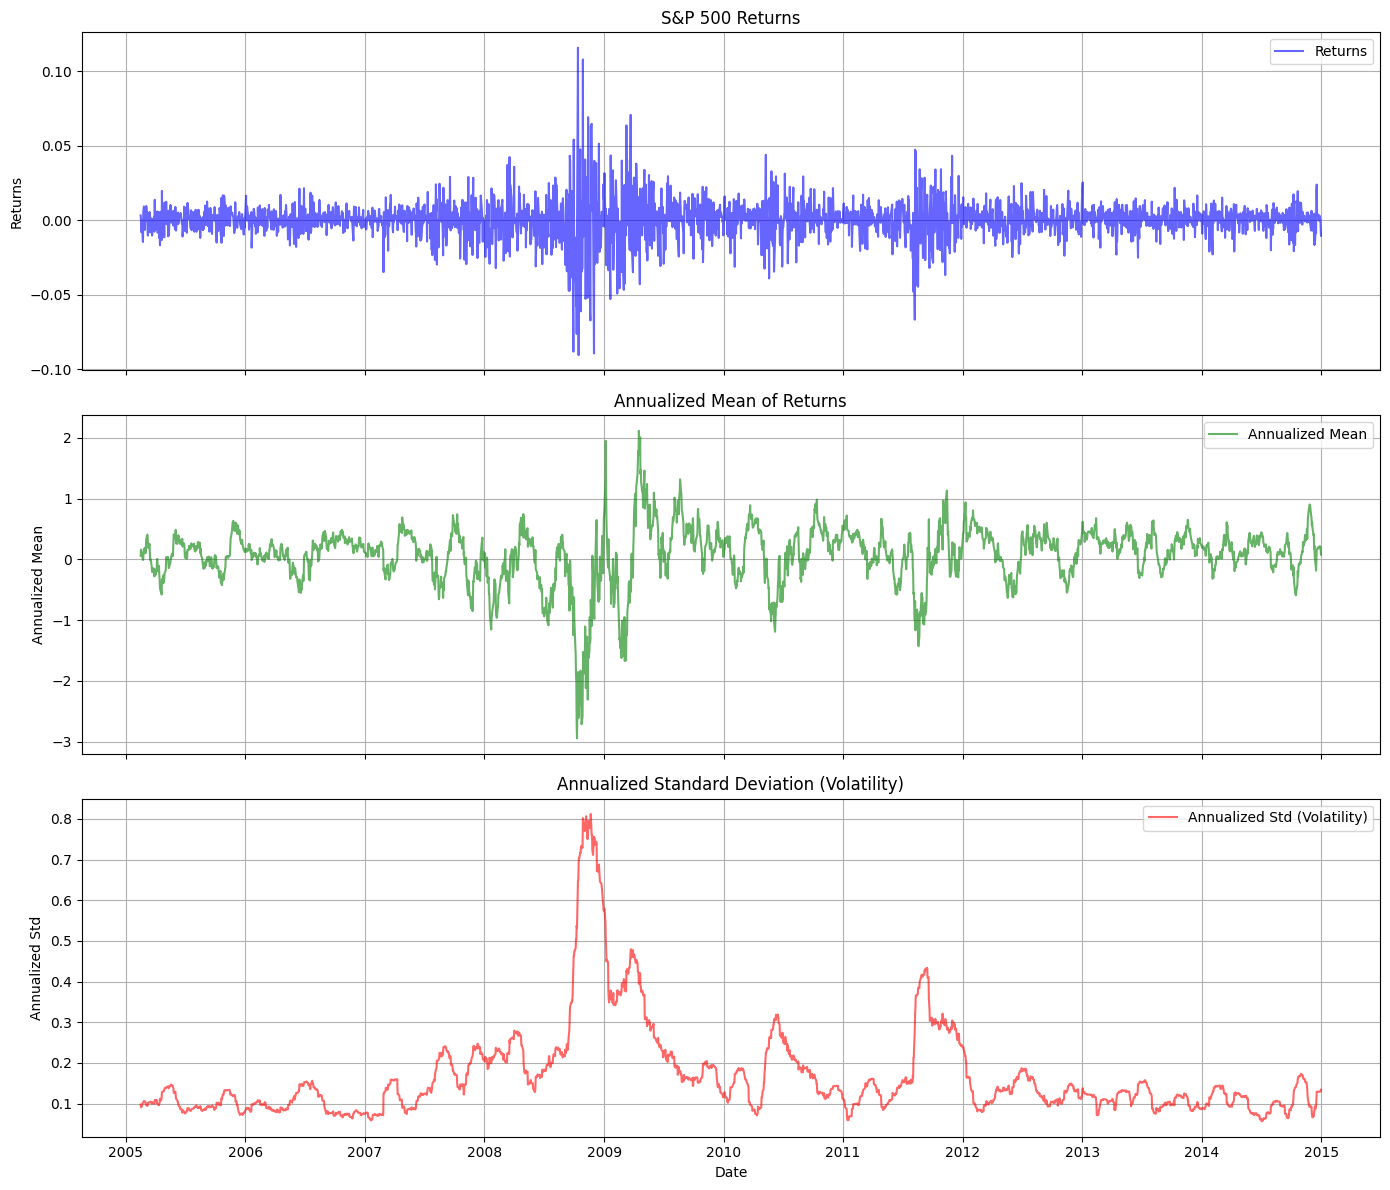

In [46]:
# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot Returns
axs[0].plot(data_sp.index, data_sp['Returns'], label='Returns', color='blue', alpha=0.6)
axs[0].set_title('S&P 500 Returns')
axs[0].set_ylabel('Returns')
axs[0].legend()
axs[0].grid()

# Plot Annualized Mean
axs[1].plot(data_sp.index, data_sp['Annualized_Mean'], label='Annualized Mean', color='green', alpha=0.6)
axs[1].set_title('Annualized Mean of Returns')
axs[1].set_ylabel('Annualized Mean')
axs[1].legend()
axs[1].grid()

# Plot Annualized Std (Volatility)
axs[2].plot(data_sp.index, data_sp['Annualized_Std'], label='Annualized Std (Volatility)', color='red', alpha=0.6)
axs[2].set_title('Annualized Standard Deviation (Volatility)')
axs[2].set_ylabel('Annualized Std')
axs[2].set_xlabel('Date')
axs[2].legend()
axs[2].grid()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()